Instaling dependencies

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**torch** for the deep learning framework,
 
 **transforms** from **torchvision **for image transformations, 
 
 **detection** from torchvision.models for the pre-trained Faster R-CNN model, and 
 
 **Image and ImageDraw** from PIL for image handling and drawing bounding boxes.

In [ ]:
import torch
from torchvision import transforms
from torchvision.models import detection
from PIL import Image ,ImageDraw

Download the Pre-trained Model:

 The model is already trained on a large dataset and contains learned parameters that enable it to detect objects in images effectively.

In [ ]:
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 56.2MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
def detect_objects(image_path):
    # Load the image
    image = Image.open(image_path)

    # Preprocess the image
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    image = transform(image)

    # Make predictions
    with torch.no_grad():
        predictions = model([image])
    # Extract bounding box coordinates and labels
    boxes = predictions[0]['boxes'].tolist()
    labels = predictions[0]['labels'].tolist()

    # Return the bounding boxes and labels
    return boxes, labels

In [ ]:
image_path = '/content/IMG-20210121-WA0113.jpg'
boxes, labels = detect_objects(image_path)

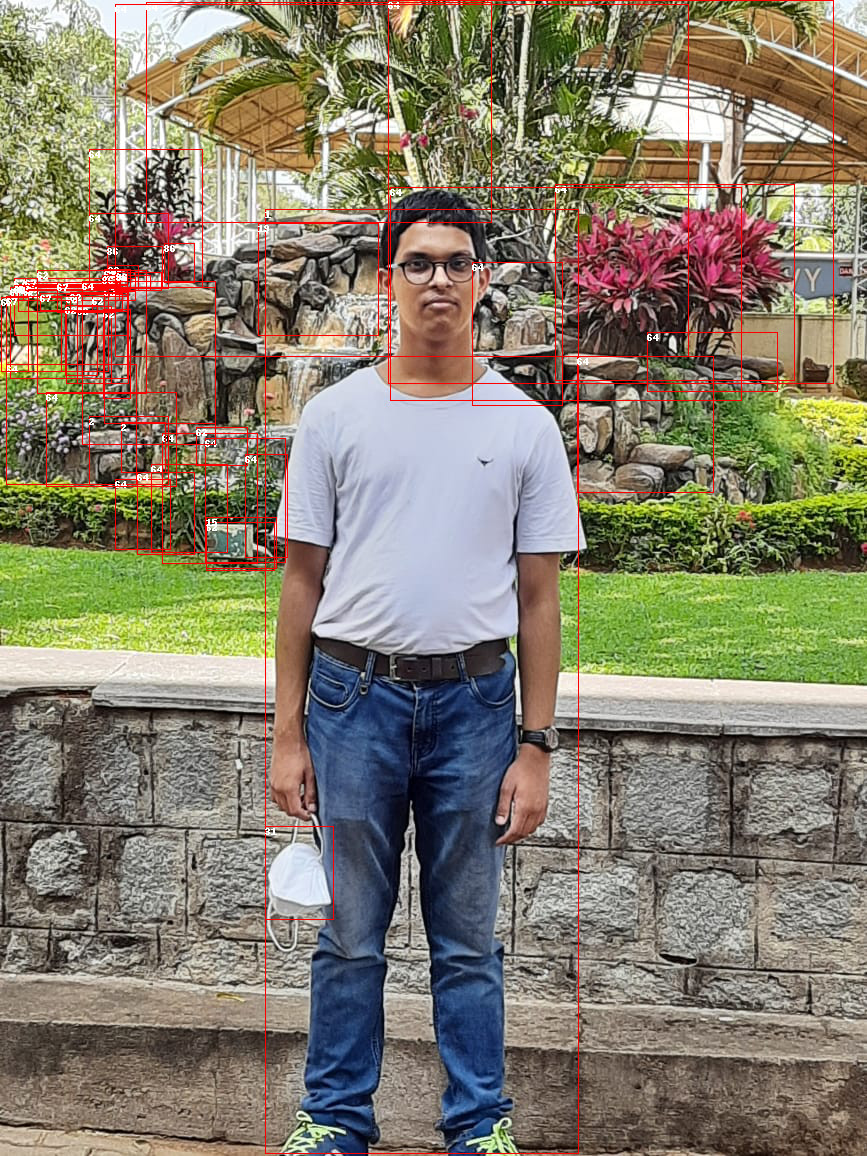

In [ ]:
image = Image.open(image_path)
draw = ImageDraw.Draw(image)
for box, label in zip(boxes, labels):
    draw.rectangle(box, outline='red')
    draw.text((box[0], box[1]), str(label))
image.show()